# PREDICTING CHURN RATE IN TELECOM INDUSTRY

# IMPORTING THE REQUIRED LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore")

# READING THE DATA

In [2]:
tc=pd.read_csv('telecom.csv',na_values=[' ','/','?','$'])

In [3]:
pd.options.display.max_columns=None
#  option to view all the columns without missing any, in the outputs

In [4]:
tc.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2643,3550-SAHFP,Female,0,No,No,33,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.35,2757.85,Yes
4431,8630-FJLIB,Female,0,No,No,18,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.80,1221.65,No
6725,2061-VVFST,Female,0,Yes,No,37,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.50,805.20,No
3389,9617-INGJY,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,70.60,70.60,No
6158,3845-FXCYS,Male,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.65,31.20,No


In [5]:
tc[tc['InternetService']=='No']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
11,7469-LKBCI,Male,0,No,No,16,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),18.95,326.80,No
16,8191-XWSZG,Female,0,No,No,52,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.65,1022.95,No
21,1680-VDCWW,Male,0,Yes,No,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),19.80,202.25,No
22,1066-JKSGK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
33,7310-EGVHZ,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),20.20,20.20,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,4807-IZYOZ,Female,0,No,No,51,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),20.65,1020.75,No
7019,9710-NJERN,Female,0,No,No,39,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.15,826.00,No
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239.00,No
7030,0871-OPBXW,Female,0,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.05,39.25,No


In [6]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    tc[i]  = tc[i].replace({'No internet service' : 'No'})

In [7]:
tc['SeniorCitizen']=tc['SeniorCitizen'].replace([0,1],['No','Yes'])
# 'SeniorCitizen' has only 1's and 0's and it is a categorical column so converting it into object

In [8]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), o

# EXPLORATORY DATA ANALYSIS

In [9]:
del tc['customerID']
#  customerID is the unqiue column and we cant get any insights from this, and hence it's removed

In [10]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.1+ MB


In [11]:
for i in tc.columns:
    print(i,':',tc[i].nunique())

gender : 2
SeniorCitizen : 2
Partner : 2
Dependents : 2
tenure : 73
PhoneService : 2
MultipleLines : 3
InternetService : 3
OnlineSecurity : 2
OnlineBackup : 2
DeviceProtection : 2
TechSupport : 2
StreamingTV : 2
StreamingMovies : 2
Contract : 3
PaperlessBilling : 2
PaymentMethod : 4
MonthlyCharges : 1585
TotalCharges : 6530
Churn : 2


In [12]:
tc.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


In [13]:
df=tc[tc['TotalCharges'].isnull()]
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,No,No,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No,No,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,Female,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,Male,No,Yes,Yes,0,Yes,No,No,No,No,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [14]:
con=(tc['Dependents']=='Yes') 
imp_mean=tc[con]
imp_mean.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
9,Male,No,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,Male,No,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
15,Female,No,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,Male,No,No,Yes,71,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No


In [15]:
male,female=imp_mean['TotalCharges'].groupby(tc['gender']).mean()
(male,female)

(2477.7936461388094, 2536.632016728623)

In [16]:
con1=(tc['gender']=='Male')& (tc['tenure']==0)
con2=(tc['TotalCharges'].isnull())
con3=con1&con2
tc[con3]=tc[con3].fillna(male)

In [17]:
con1=(tc['gender']=='Female')& (tc['tenure']==0)
con2=(tc['TotalCharges'].isnull())
con3=con1&con2
tc[con3]=tc[con3].fillna(female)

In [18]:
tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.1+ MB


In [19]:
tc.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.645978
std,24.559481,30.090047,2265.017405
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [20]:
catcols=tc.select_dtypes('object')
catcols

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,No,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,No,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [21]:
# Taking all columns whose categories are more than 2 and check if they are significantly different
l=[]
for i in catcols.columns:
    if catcols[i].nunique()>2:
        l.append(i)
print(l)

['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']


In [22]:
# Since there are more two categories we perform chi2_contingency
# we consider those columns whose p_val is <0.05
from scipy.stats import chi2_contingency
f=[]
for i in l:
    cc=chi2_contingency(pd.crosstab(catcols['Churn'],catcols[i]))
    if(cc[1]<=0.05):
        f.append(i)
print(f)

['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']


In [23]:
# Taking all columns whose categories are less than 2 and check if they are significantly different
k=[]
for i in catcols.columns:
    if catcols[i].nunique()==2:
        k.append(i)
k.pop(-1) # since 'Churn' is our predictive varibale we remove it from here, to compare every categorical value with 'Churn'
print(k)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


# PROPORTION Z_TEST

In [24]:
# Since there are two categories we perform proportions_ztest
# we consider those columns whose p_val is <0.05
from statsmodels.stats.proportion import proportions_ztest
g=[]
for i in k:
    c=pd.crosstab(tc['Churn'],tc[i])
    x1=c.iloc[1,1]
    x2=c.iloc[1,0]
    n1=c.iloc[:,1].sum()
    n2=c.iloc[:,0].sum()
    cc=proportions_ztest([x1,x2],[n1,n2])
    if(cc[1]<=0.05):
        g.append(i)
print(g)

['SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


In [25]:
# List of categorical whose p<0.05 after proportion_ztest and chi2_contingency test
f_list=f+g
print(f_list,'\n')
print('Total number of required columns:',len(f_list))

['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'SeniorCitizen', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling'] 

Total number of required columns: 14


In [26]:
tc['Churn'].value_counts(),

(No     5174
 Yes    1869
 Name: Churn, dtype: int64,)

In [27]:
f_list

['MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling']

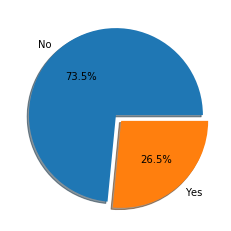

In [28]:
plt.pie(tc['Churn'].value_counts(),explode=(0,0.09),autopct='%1.1f%%',labels=('No','Yes'),shadow=True)
plt.savefig('Churn pct')
plt.show()

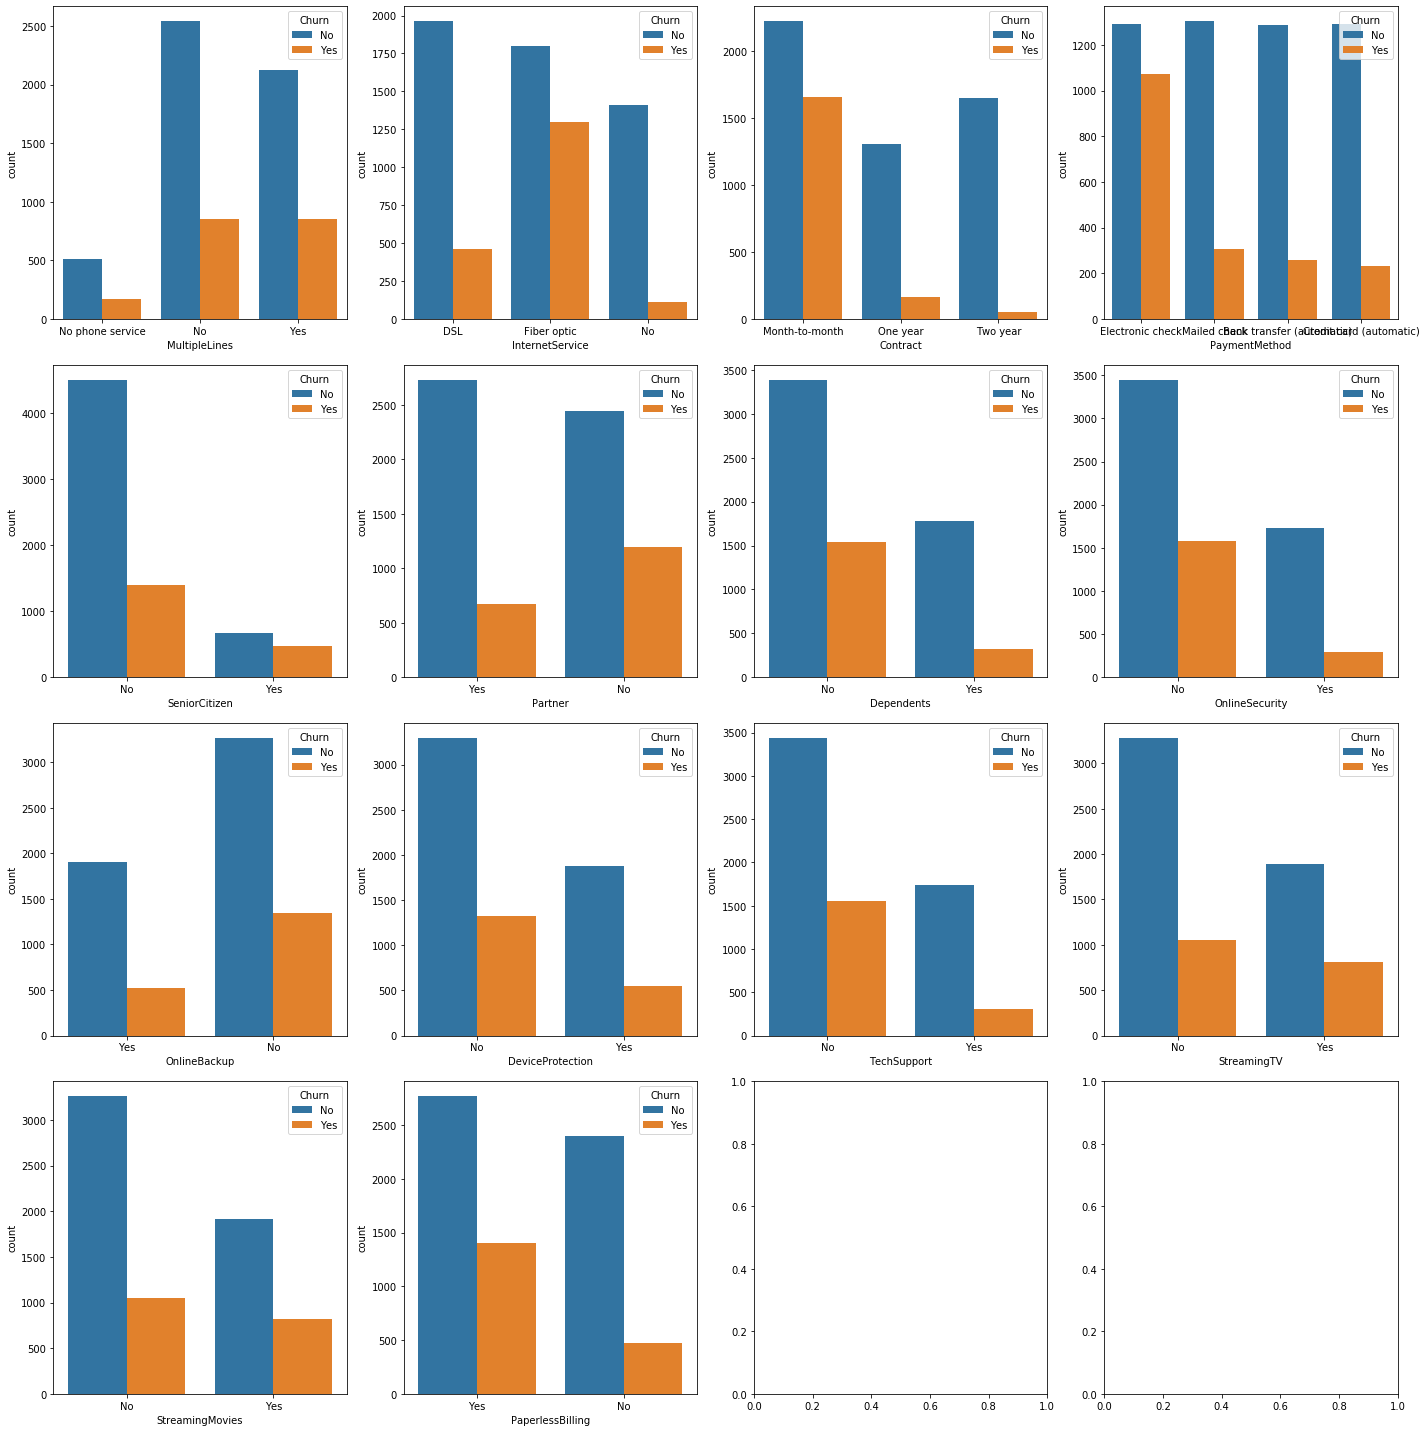

In [29]:
fig,axes=plt.subplots(4,4,figsize=(20,20))
axes=axes.flatten()
for i in range(0,len(f_list)):
    sns.countplot(tc[f_list[i]],hue=tc['Churn'],ax=axes[i])
plt.tight_layout()
plt.savefig('Attribute wise comparison with Churn')
plt.show()

In [30]:
# creating one hot encoding for the selected columns
tc_dum=pd.get_dummies(tc[f_list])
tc_dum.head()
print(tc_dum.shape)

(7043, 33)


In [31]:
num=tc.select_dtypes(['int64','float'])
num
X=pd.concat([tc_dum,num],axis=1)
y=tc['Churn']

# SPLITTING THE DATA INTO TRAIN AND TEST

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 7,test_size=0.30)

# LOGISTIC REGRESSION (CLASSIFICATION)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg_result=logreg.fit(X_train,y_train)

print("Training set score: {:.3f}".format(logreg_result.score(X_train,y_train)))
print("Test score: {:.3f}".format(logreg_result.score(X_test,y_test)))

Training set score: 0.806
Test score: 0.804


In [34]:
logreg_result

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
y_pred  = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)
y_proba
# y_proba consists of p and (1-p) values, but we use (1-p) values for roc curve

array([[0.89232079, 0.10767921],
       [0.46600471, 0.53399529],
       [0.35915539, 0.64084461],
       ...,
       [0.98951375, 0.01048625],
       [0.48165917, 0.51834083],
       [0.99299802, 0.00700198]])

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score,classification_report

y_test1=y_test.replace(['Yes','No'],[True,False])
y_train1=y_train.replace(['Yes','No'],[True,False])
fpr, tpr, thresholds = roc_curve(y_test1, y_proba[:,1])

Area under the curve for LOGISTIC REGRESSION:  0.84349224935876


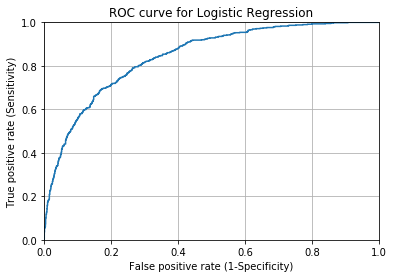

In [37]:
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logistic Regression')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

roc_auc = auc(fpr,tpr)
print("Area under the curve for LOGISTIC REGRESSION: " , roc_auc)

In [38]:
from statsmodels.tools import add_constant as add_constant
import statsmodels.api as sm
X_train1=sm.add_constant(X_train)
logit_model=sm.Logit(y_train1,X_train1)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.409573
         Iterations: 35
                                            Results: Logit
Model:                           Logit                         Pseudo R-squared:              0.285    
Dependent Variable:              Churn                         AIC:                           4084.3857
Date:                            2019-12-13 11:13              BIC:                           4233.9568
No. Observations:                4930                          Log-Likelihood:                -2019.2  
Df Model:                        22                            LL-Null:                       -2824.3  
Df Residuals:                    4907                          LLR p-value:                   0.0000   
Converged:                       0.0000                        Scale:                         1.0000   
No. Iterations:                  35.0000                                                               
-------------------------------------------

# RECURSIVE FEATURE ELIMINATION

In [39]:
from sklearn.feature_selection import RFE

logit = LogisticRegression()

rfe = RFE(logit,10)
rfe = rfe.fit(X_train,y_train)

print(rfe.support_)
print(rfe.ranking_)
#identified columns Recursive Feature Elimination

[False  True False False  True  True  True  True  True  True  True False
 False False False False False False False False  True False False False
 False False  True False False False False False False False False False]
[20  1 23 14  1  1  1  1  1  1  1 11 19 13 22 16  2 24  9 15  1 17  5 12
  8 18  1  3  4  7 10  6 26 21 25 27]


In [40]:
idc_rfe = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" :X_train.columns ,
                       "ranking" : rfe.ranking_,
                      })
cols = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()
cols

['MultipleLines_No phone service',
 'InternetService_Fiber optic',
 'InternetService_No',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Bank transfer (automatic)',
 'PaymentMethod_Credit card (automatic)',
 'OnlineSecurity_Yes',
 'TechSupport_Yes']

In [41]:
# From the RFE we filter the best columns where support is True
X_train_rfe=X_train[cols]
X_test_rfe=X_test[cols]

# RANDOM FOREST

In [42]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier(random_state=10)
RF_results=RF_model.fit(X_train_rfe,y_train)

In [43]:
y_pred_test = RF_model.predict(X_test_rfe)
y_pred_train = RF_model.predict(X_train_rfe)

In [44]:
print(classification_report(y_train,y_pred_train))
print('Train Accuracy Score for Random Forest 1st attempt',accuracy_score(y_train,y_pred_train))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      3649
         Yes       0.61      0.51      0.55      1281

    accuracy                           0.79      4930
   macro avg       0.73      0.70      0.71      4930
weighted avg       0.78      0.79      0.78      4930

Train Accuracy Score for Random Forest 1st attempt 0.7890466531440162


In [45]:
print(classification_report(y_test,y_pred_test))
print('Test Accuracy Score for Random Forest 1st attempt',accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

          No       0.82      0.88      0.85      1525
         Yes       0.62      0.48      0.54       588

    accuracy                           0.77      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113

Test Accuracy Score for Random Forest 1st attempt 0.7723615712257453


# GRID SEARCH

In [46]:
from sklearn.model_selection import GridSearchCV
RF_model=RandomForestClassifier(n_estimators=10,random_state=10)
param_grid_rf={'n_estimators':[11,12,13,9],'max_features':['auto','sqrt'],}
clf=GridSearchCV(RF_model,param_grid_rf,cv=2)
clf.fit(X_train_rfe,y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=10,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_

In [47]:
clf.best_params_

{'max_features': 'auto', 'n_estimators': 9}

In [48]:
RF_best_model=RandomForestClassifier(n_estimators=9,random_state=10)
RF_best_model.fit(X_train_rfe,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [49]:
y_train_pred=clf.predict(X_train_rfe)
y_test_pred=clf.predict(X_test_rfe)
(y_train_pred,y_test_pred)

(array(['No', 'Yes', 'No', ..., 'No', 'No', 'No'], dtype=object),
 array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object))

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(classification_report(y_train,y_train_pred))
print('Train Accuracy Random Forest after Grid Search CV :',accuracy_score(y_train,y_train_pred))

              precision    recall  f1-score   support

          No       0.84      0.89      0.86      3649
         Yes       0.61      0.51      0.55      1281

    accuracy                           0.79      4930
   macro avg       0.73      0.70      0.71      4930
weighted avg       0.78      0.79      0.78      4930

Train Accuracy Random Forest after Grid Search CV : 0.7890466531440162


In [51]:
print(classification_report(y_test,y_test_pred))
print('Test Accuracy Random Forest after Grid Search CV :',accuracy_score(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       0.82      0.88      0.85      1525
         Yes       0.62      0.48      0.54       588

    accuracy                           0.77      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.76      0.77      0.76      2113

Test Accuracy Random Forest after Grid Search CV : 0.7723615712257453


In [52]:
y_test_pred=pd.DataFrame(RF_best_model.predict(X_test_rfe))
y_proba_rf = RF_best_model.predict_proba(X_test_rfe)
# y_proba_rf

In [53]:
y_test1=y_test.replace(['Yes','No'],[True,False])
y_train1=y_train.replace(['Yes','No'],[True,False])
fpr1, tpr1, thresholds = roc_curve(y_test1, y_proba_rf[:,1])
(fpr1, tpr1)
# print(len(y_proba_rf[:,1]))

(array([0.        , 0.07803279, 0.0957377 , 0.11409836, 0.11540984,
        0.11803279, 0.1357377 , 0.13639344, 0.13836066, 0.13901639,
        0.15344262, 0.1947541 , 0.21639344, 0.22229508, 0.22360656,
        0.23344262, 0.23672131, 0.2452459 , 0.2557377 , 0.26754098,
        0.27016393, 0.28065574, 0.28918033, 0.29508197, 0.30098361,
        0.30622951, 0.30819672, 0.3095082 , 0.31803279, 0.32      ,
        0.32721311, 0.33704918, 0.3495082 , 0.40786885, 0.42163934,
        0.42688525, 0.43606557, 0.44131148, 0.44262295, 0.44786885,
        0.44852459, 0.45442623, 0.45770492, 0.46360656, 0.46622951,
        0.47213115, 0.47540984, 0.48459016, 0.48786885, 0.49245902,
        0.4957377 , 0.50163934, 0.50491803, 0.51016393, 0.51344262,
        0.51868852, 0.52786885, 0.53311475, 0.53770492, 0.54557377,
        0.54819672, 0.55606557, 0.56      , 0.56262295, 0.56590164,
        0.57639344, 0.58557377, 0.60131148, 0.60918033, 0.61114754,
        0.6157377 , 0.61967213, 0.63147541, 0.63

Area under the curve for RANDOM FOREST:  0.8092829262852682


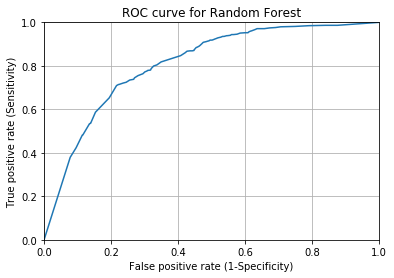

In [54]:
plt.plot(fpr1,tpr1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Random Forest')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

roc_auc1 = auc(fpr1,tpr1)
print("Area under the curve for RANDOM FOREST: " , roc_auc1)

# BAGGING

In [55]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [56]:
bag_model = BaggingClassifier(DecisionTreeClassifier(random_state=1))
bag_model.fit(X_train_rfe,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=1,
                                                        splitter='best'),
       

In [57]:
bag_pred = bag_model.predict(X_test_rfe)
accuracy_score(y_test, bag_pred)

0.7728348319924279

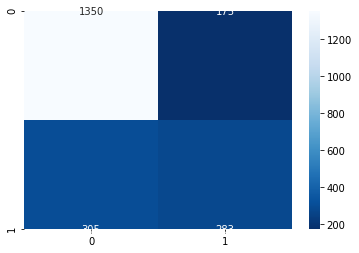

In [58]:
bag_cm = confusion_matrix(y_test, bag_pred)
sns.heatmap(bag_cm,annot=True,fmt='d',cmap='Blues_r')
plt.show()

In [59]:
print(classification_report(y_test,bag_pred))

              precision    recall  f1-score   support

          No       0.82      0.89      0.85      1525
         Yes       0.62      0.48      0.54       588

    accuracy                           0.77      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.76      0.77      0.76      2113



In [60]:
y_pred_bag=bag_model.predict(X_test_rfe)
y_pred_proba_bag=bag_model.predict_proba(X_test_rfe)
fpr2, tpr2, thresholds = roc_curve(y_test1, y_pred_proba_bag[:,1])
(fpr2, tpr2)

(array([0.        , 0.07803279, 0.0957377 , 0.11409836, 0.1147541 ,
        0.11606557, 0.13377049, 0.13508197, 0.1357377 , 0.15016393,
        0.15081967, 0.15606557, 0.19737705, 0.2       , 0.22163934,
        0.22754098, 0.23737705, 0.24065574, 0.24918033, 0.25442623,
        0.25639344, 0.26163934, 0.26754098, 0.2695082 , 0.27540984,
        0.28590164, 0.29967213, 0.30819672, 0.31081967, 0.31934426,
        0.33180328, 0.34163934, 0.34754098, 0.34885246, 0.40721311,
        0.40983607, 0.41704918, 0.42622951, 0.43213115, 0.43540984,
        0.44065574, 0.44655738, 0.44983607, 0.4557377 , 0.46098361,
        0.46688525, 0.47147541, 0.47344262, 0.47868852, 0.48459016,
        0.48786885, 0.49311475, 0.49508197, 0.50295082, 0.51213115,
        0.51540984, 0.52065574, 0.52393443, 0.52721311, 0.52852459,
        0.53311475, 0.53770492, 0.54557377, 0.55081967, 0.5547541 ,
        0.56393443, 0.56655738, 0.57704918, 0.58163934, 0.5895082 ,
        0.59147541, 0.59409836, 0.60327869, 0.61

Area under the curve for BAGGING:  0.8096843983495037


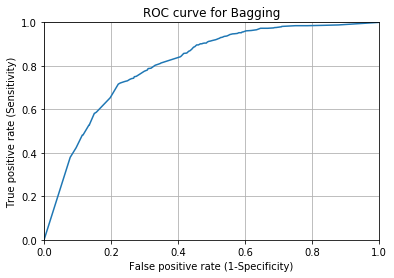

In [61]:
plt.plot(fpr2,tpr2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Bagging')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

roc_auc2 = auc(fpr2,tpr2)
print("Area under the curve for BAGGING: " , roc_auc2)

# K-NEAREST NEIGHBORS

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
knn=KNeighborsClassifier()
knn.fit(X_train_rfe,y_train)
y_pred_knn=knn.predict(X_test_rfe)

In [64]:
accuracy_score(y_pred_knn,y_test)

0.7326076668244202

In [65]:
y_pred_proba_knn=knn.predict_proba(X_test_rfe)
fpr3, tpr3, thresholds = roc_curve(y_test1, y_pred_proba_knn[:,1])

Area under the curve for K-NEAREST NEIGHBORS:  0.7662947474071595


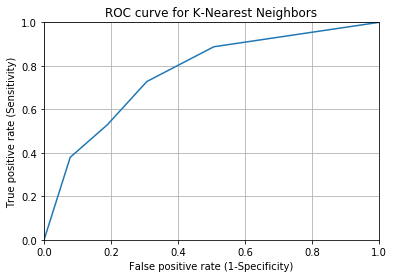

In [66]:
plt.plot(fpr3,tpr3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for K-Nearest Neighbors')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

roc_auc3 = auc(fpr3,tpr3)
print("Area under the curve for K-NEAREST NEIGHBORS: " , roc_auc3)

# GRADIENT BOOSTING

In [67]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
gb_model.fit(X_train_rfe,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [68]:
gb_pred = gb_model.predict(X_test_rfe)
accuracy_score(y_test, gb_pred)

0.7217226691907241

In [69]:
y_pred_gb=gb_model.predict(X_test_rfe)
y_pred_proba_gb=gb_model.predict_proba(X_test_rfe)
fpr4, tpr4, thresholds = roc_curve(y_test1, y_pred_proba_gb[:,1])

Area under the curve for GRADIENT BOOSTING:  0.8125805732128917


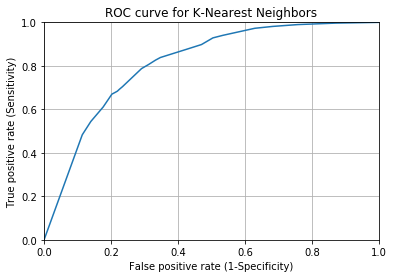

In [70]:
plt.plot(fpr4,tpr4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for K-Nearest Neighbors')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

roc_auc4 = auc(fpr4,tpr4)
print("Area under the curve for GRADIENT BOOSTING: " , roc_auc4)

# COMPARING THE MODELS

Area under the curve for LOGISTIC REGRESSION:  0.84349224935876
Area under the curve for RANDOM FOREST:        0.8092829262852682
Area under the curve for BAGGING:              0.8096843983495037
Area under the curve for K-NEAREST NEIGHBORS:  0.7662947474071595
Area under the curve for GRADIENT BOOSTING:    0.8125805732128917


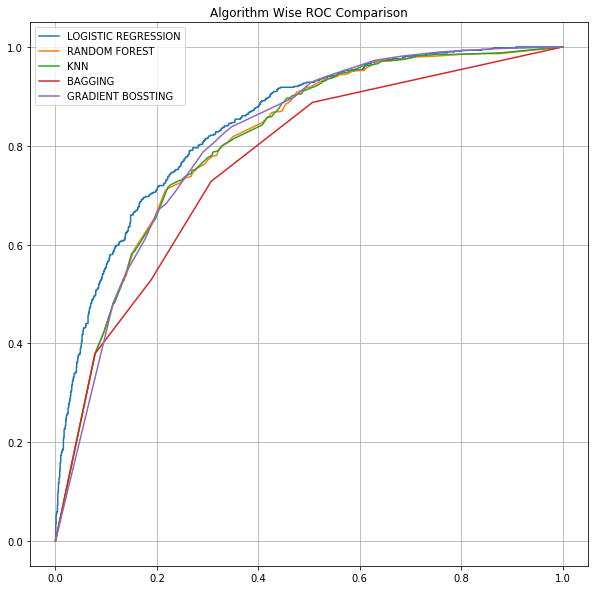

In [71]:
# ROC Curves for Logistic Regression and Random Forest
plt.figure(figsize=(10,10))

plt.plot(fpr,tpr)# log reg
roc_auc = auc(fpr,tpr)

plt.plot(fpr1,tpr1)# rand for
roc_auc1 = auc(fpr1,tpr1)

plt.plot(fpr2,tpr2)# KNN
roc_auc2 = auc(fpr2,tpr2)

plt.plot(fpr3,tpr3)# Bagging
roc_auc3 = auc(fpr3,tpr3)

plt.plot(fpr4,tpr4)# Gradiant Boosting
roc_auc4 = auc(fpr4,tpr4)

print("Area under the curve for LOGISTIC REGRESSION: " , roc_auc)
print("Area under the curve for RANDOM FOREST:       " , roc_auc1)
print("Area under the curve for BAGGING:             " , roc_auc2)
print("Area under the curve for K-NEAREST NEIGHBORS: " , roc_auc3)
print("Area under the curve for GRADIENT BOOSTING:   " , roc_auc4)


plt.grid()
plt.title('Algorithm Wise ROC Comparison')
plt.legend(['LOGISTIC REGRESSION','RANDOM FOREST','KNN','BAGGING','GRADIENT BOSSTING'])
plt.savefig('ROC Curves')

In [72]:
models = [('LOGISTIC REGRESSION', LogisticRegression()),  
          ('RANDOM FOREST', RandomForestClassifier()), 
          ('KNN', KNeighborsClassifier()), 
          ('BAGGING',BaggingClassifier()),
          ('GRADIENT BOOSTING', GradientBoostingClassifier())]

In [73]:
seed = 7
results = []
names = []
from sklearn.model_selection import KFold, cross_val_score
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_test_rfe, y_test, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LOGISTIC REGRESSION: 0.773310 (0.024993)
RANDOM FOREST: 0.762888 (0.024451)
KNN: 0.721260 (0.036829)
BAGGING: 0.766203 (0.023760)
GRADIENT BOOSTING: 0.773793 (0.031080)


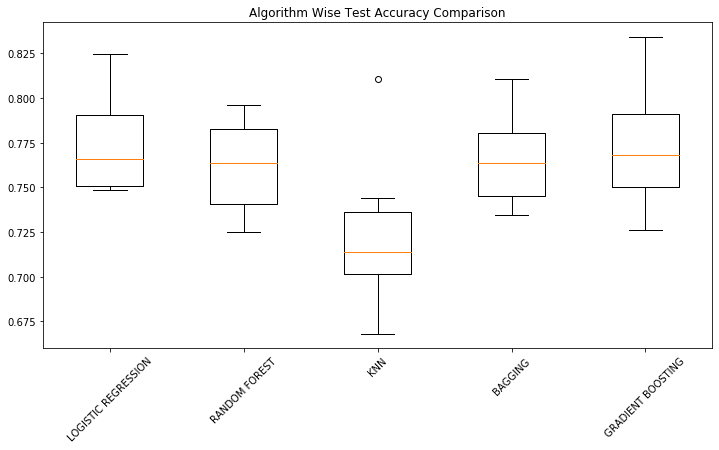

In [74]:
fig, ax = plt.subplots(figsize=(12,6))
plt.boxplot(results)
plt.title('Algorithm Wise Test Accuracy Comparison')
ax.set_xticklabels(names,rotation=45)
plt.ylabel('')
plt.savefig('Algorithm Wise Test Accuracy Comparison')
plt.show()

In [75]:
seed_train = 7
results_train = []
names_train = []
from sklearn.model_selection import KFold, cross_val_score
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed_train)
    cv_results = cross_val_score(model, X_train_rfe, y_train, cv=kfold, scoring='accuracy')
    results_train.append(cv_results)
    names_train.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LOGISTIC REGRESSION: 0.781339 (0.011751)
RANDOM FOREST: 0.782556 (0.012398)
KNN: 0.772414 (0.012365)
BAGGING: 0.785396 (0.008154)
GRADIENT BOOSTING: 0.788641 (0.009286)


<Figure size 864x432 with 0 Axes>

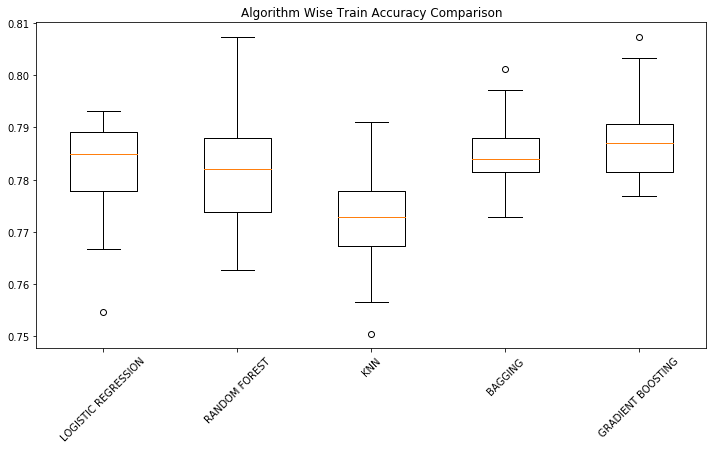

In [76]:
plt.figure(figsize=(12,6))
fig, ax = plt.subplots(figsize=(12,6))
plt.boxplot(results_train)
plt.title('Algorithm Wise Train Accuracy Comparison')
ax.set_xticklabels(names_train,rotation=45)
plt.ylabel('')
plt.savefig('Algorithm Wise Train Accuracy Comparison')
plt.show()

# CONCLUSION